<a href="https://colab.research.google.com/github/Shakera-M-Hanif/NLP_Projects/blob/main/NLP_TrainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP PRACTICAL-10 Training a model using NLP Techniques**

### Aim:To train a model for Movie Review Classification using NLP Techniques.


---








Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 

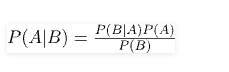

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.

P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).

P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

In [ ]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

In [ ]:
documents = []

for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):    
        documents.append((list(movie_reviews.words(fileid)), category))

In [ ]:
random.shuffle(documents)

In [ ]:
print(documents[1])

(['with', 'the', 'release', 'of', 'gattaca', ',', 'i', 'began', 'to', 'wonder', 'why', 'all', 'science', 'fiction', 'films', 'deal', 'with', 'destructive', 'aliens', ',', 'or', 'aliens', 'in', 'general', '.', 'hollywood', 'has', 'given', 'audiences', 'plenty', 'of', 'thrills', 'with', 'those', 'alien', 'films', ',', 'but', 'what', 'was', 'usually', 'lacking', 'was', 'a', 'good', 'story', '.', '.', '.', 'and', 'good', 'characters', '.', '.', '.', 'and', 'good', 'acting', ',', 'etc', '(', 'contact', 'being', 'the', 'exception', ')', '.', 'and', 'for', 'some', 'reason', ',', 'hollywood', 'has', 'never', 'taken', 'a', 'look', 'at', 'the', 'aliens', 'here', 'on', 'earth', '.', 'the', 'closest', ',', 'that', 'i', 'have', 'seen', 'anyway', ',', 'was', '2001', ':', 'a', 'space', 'odyssey', ',', 'which', 'made', 'mankind', 'an', 'alien', 'race', 'themselves', ',', 'being', 'dwarfed', 'by', 'the', 'technology', 'which', 'they', 'created', '.', 'now', 'comes', 'gattaca', ',', 'another', 'film', '

In [ ]:
## Normalize the dataset ##
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

In [ ]:
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print(all_words["love"])

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
1119


In [ ]:
word_features = list(all_words.keys())[:3000]

In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [ ]:
print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))
featuresets = [(find_features(rev), category) 
                for (rev, category) in documents]

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [ ]:
training_set = featuresets[ :1900]
testing_set = featuresets[1900: ]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("Accuracy:",
     (nltk.classify.accuracy(classifier, testing_set))*100)

Accuracy: 81.0


In [ ]:
classifier.show_most_informative_features(-10)

Streaming output truncated to the last 5000 lines.
                   snuff = True              neg : pos    =      1.7 : 1.0
                  decent = True              neg : pos    =      1.7 : 1.0
                 heroine = True              pos : neg    =      1.7 : 1.0
                  nights = True              pos : neg    =      1.7 : 1.0
               therefore = True              pos : neg    =      1.7 : 1.0
                    whom = True              pos : neg    =      1.7 : 1.0
                 general = True              pos : neg    =      1.7 : 1.0
                 product = True              neg : pos    =      1.7 : 1.0
                  hoping = True              neg : pos    =      1.7 : 1.0
                   empty = True              neg : pos    =      1.7 : 1.0
                    save = True              neg : pos    =      1.7 : 1.0
                  family = True              pos : neg    =      1.7 : 1.0
                  reason = True              neg 



---



---



---

